In [1]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

In [2]:
url = "https://www.skysports.com/football/news"

ua = UserAgent()
user_agent = ua.random
headers = {"user-agent": user_agent}

ss = requests.session()
res = ss.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

In [3]:
soup.select('div[class="news-list__item news-list__item--show-thumb-bp30"] a[class="news-list__figure"]')[0]["href"]

'https://www.skysports.com/football/news/11679/12390748/cristiano-ronaldo-man-city-interested-in-signing-juventus-forward'

In [4]:
all_article = []
for i in soup.select('div[class="news-list__item news-list__item--show-thumb-bp30"] a[class="news-list__figure"]'):
    article_url = i["href"]
    
    res_article = ss.get(article_url, headers=headers)
    soup_article = BeautifulSoup(res_article.text, "html.parser")
    article = []
    
    for i in soup_article.select('div[class="sdc-article-body sdc-article-body--lead"] p'):
        article.append(i.text)
    article = " ".join(article)
    all_article.append(article)
    
all_article = " ".join(all_article)

In [5]:
import nltk

In [6]:
sentences = nltk.sent_tokenize(all_article)

for sentence in sentences[:15]:
    print(sentence)

Manchester City are interested in signing Cristiano Ronaldo from Juventus, according to Sky in Italy.
City are willing to offer Ronaldo a two-year contract, with a salary of £12.8m-per-season (€15m), and would like to sign the Portugal captain for free.
But Juventus want at least £21.4m (€25m) as a transfer fee and no formal offer has been made yet.
The 36-year-old, who scored 118 goals in 292 games for Manchester United between 2003 and 2009, has been linked with a move away from the Allianz Stadium this summer and is understood to be open to leaving, but Juventus expect him to stay.
Ronaldo has not directly communicated to the club that he wants to depart.
His current contract at the Allianz Stadium runs until June 2022 and he is earning €31m per year after tax.
City are the only club currently interested in signing Ronaldo, with Paris Saint-Germain not in the picture.
Ronaldo's representatives are pushing for a move, while Juventus would like to sign Gabriel Jesus to be a part of th

In [7]:
tokens = [nltk.tokenize.word_tokenize(sentence) for sentence in sentences]
for token in tokens[:3]:
    print(token)

['Manchester', 'City', 'are', 'interested', 'in', 'signing', 'Cristiano', 'Ronaldo', 'from', 'Juventus', ',', 'according', 'to', 'Sky', 'in', 'Italy', '.']
['City', 'are', 'willing', 'to', 'offer', 'Ronaldo', 'a', 'two-year', 'contract', ',', 'with', 'a', 'salary', 'of', '£12.8m-per-season', '(', '€15m', ')', ',', 'and', 'would', 'like', 'to', 'sign', 'the', 'Portugal', 'captain', 'for', 'free', '.']
['But', 'Juventus', 'want', 'at', 'least', '£21.4m', '(', '€25m', ')', 'as', 'a', 'transfer', 'fee', 'and', 'no', 'formal', 'offer', 'has', 'been', 'made', 'yet', '.']


In [8]:
pos = [nltk.pos_tag(token) for token in tokens]
# for i in pos:
#     print(i)

In [9]:
wordnet_pos = []
for p in pos:
    for word, tag in p:
        if tag.startswith("J"):
            wordnet_pos.append(nltk.corpus.wordnet.ADJ)
        elif tag.startswith("V"):
            wordnet_pos.append(nltk.corpus.wordnet.VERB)
        elif tag.startswith("N"):
            wordnet_pos.append(nltk.corpus.wordnet.NOUN)
        elif tag.startswith("R"):
            wordnet_pos.append(nltk.corpus.wordnet.ADV)
        else:
            wordnet_pos.append(nltk.corpus.wordnet.NOUN)

In [10]:
lemmmatizer = nltk.stem.wordnet.WordNetLemmatizer()
tokens = [lemmmatizer.lemmatize(p[n][0], pos=wordnet_pos[n]) for p in pos for n in range(len(p))]

for token in tokens[:15]:
    print(token)

Manchester
City
be
interested
in
sign
Cristiano
Ronaldo
from
Juventus
,
accord
to
Sky
in


In [11]:
nltk_stopwords = nltk.corpus.stopwords.words("english")
tokens = [token for token in tokens if token not in nltk_stopwords]
for token in tokens[:15]:
    print(token)

Manchester
City
interested
sign
Cristiano
Ronaldo
Juventus
,
accord
Sky
Italy
.
City
offer
Ronaldo


In [12]:
ne_chunked_sents = [nltk.ne_chunk(tag) for tag in pos]
ne_chunked_sents[:3]

[Tree('S', [('Manchester', 'NNP'), ('City', 'NNP'), ('are', 'VBP'), ('interested', 'JJ'), ('in', 'IN'), ('signing', 'VBG'), Tree('PERSON', [('Cristiano', 'NNP'), ('Ronaldo', 'NNP')]), ('from', 'IN'), Tree('GPE', [('Juventus', 'NNP')]), (',', ','), ('according', 'VBG'), ('to', 'TO'), ('Sky', 'NNP'), ('in', 'IN'), Tree('GPE', [('Italy', 'NNP')]), ('.', '.')]),
 Tree('S', [('City', 'NNP'), ('are', 'VBP'), ('willing', 'JJ'), ('to', 'TO'), ('offer', 'VB'), Tree('PERSON', [('Ronaldo', 'NNP')]), ('a', 'DT'), ('two-year', 'JJ'), ('contract', 'NN'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('salary', 'NN'), ('of', 'IN'), ('£12.8m-per-season', 'NNP'), ('(', '('), ('€15m', 'NNP'), (')', ')'), (',', ','), ('and', 'CC'), ('would', 'MD'), ('like', 'VB'), ('to', 'TO'), ('sign', 'VB'), ('the', 'DT'), Tree('GPE', [('Portugal', 'NNP')]), ('captain', 'NN'), ('for', 'IN'), ('free', 'JJ'), ('.', '.')]),
 Tree('S', [('But', 'CC'), Tree('PERSON', [('Juventus', 'NNP')]), ('want', 'VBP'), ('at', 'IN'), ('least

In [13]:
name_entities = []

for ne_tagged_sentence in ne_chunked_sents:
    for tagged_tree in ne_tagged_sentence:
        if hasattr(tagged_tree, "label"):
            entity_name = " ".join(c[0] for c in tagged_tree.leaves())
            entity_type = tagged_tree.label()
            name_entities.append((entity_name, entity_type))
            name_entities = list(set(name_entities))

for ner in name_entities[:15]:
    print(ner)

('Rodon', 'ORGANIZATION')
('Newport', 'GPE')
('Alexis Sanchez', 'PERSON')
('Joe', 'PERSON')
('Jon McLaughlin', 'PERSON')
('Craig Bryson', 'PERSON')
('Manchester City', 'PERSON')
('Brom', 'ORGANIZATION')
('Fabinho', 'PERSON')
('Kylian', 'GPE')
('Tottenham', 'GPE')
('England', 'ORGANIZATION')
('Kylian Mbappe', 'PERSON')
('Man City', 'PERSON')
('Carabao Cup', 'PERSON')


### Football news to WordCloud

In [14]:
entities_to_wc = []

for ne_tagged_sentence in ne_chunked_sents:
    for tagged_tree in ne_tagged_sentence:
        if hasattr(tagged_tree, "label"):
            entity_name = " ".join(c[0] for c in tagged_tree.leaves())
            entities_to_wc.append(entity_name)

In [15]:
with open(file='my_stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')

In [16]:
entities_to_wc = [e for e in entities_to_wc if e.upper() not in stop_words]

In [17]:
text = " ".join(entities_to_wc)

### Word Cloud

In [18]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

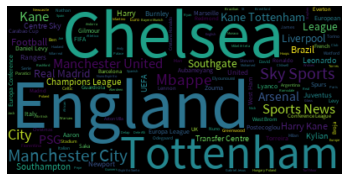

In [19]:
wordcloud = WordCloud(font_path='TaipeiSansTCBeta-Regular.ttf').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()